## **Insurance Prediction**

## Import

In [1227]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

Read data

In [1228]:
df = pd.read_csv('insurance.csv')

In [1229]:
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [1230]:
df.shape

(1338, 13)

In [1231]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

## Data Preprocessing

For predicting charges we can`t use features like claim Amount and Hospital_expenditure, Because it doesnot get upfront

In [1232]:
df.drop(['Claim_Amount','Hospital_expenditure'],axis=1,inplace=True)

Correlation between features

In [1233]:
df.select_dtypes('number').corr()

,age,bmi,children,past_consultations,num_of_steps,NUmber_of_past_hospitalizations,Anual_Salary,charges
age,1.000000,0.112849,0.041558,0.169275,0.517930,0.363041,0.164328,0.294390
bmi,0.112849,1.000000,0.007944,0.131246,0.136368,0.137575,0.241941,0.198794
children,0.041558,0.007944,1.000000,0.054787,0.163522,0.185607,0.040070,0.070747
past_consultations,0.169275,0.131246,0.054787,1.000000,0.562344,0.503798,0.596322,0.629836
num_of_steps,0.517930,0.136368,0.163522,0.562344,1.000000,0.850089,0.739426,0.890642
NUmber_of_past_hospitalizations,0.363041,0.137575,0.185607,0.503798,0.850089,1.000000,0.743466,0.823581
Anual_Salary,0.164328,0.241941,0.040070,0.596322,0.739426,0.743466,1.000000,0.954255
charges,0.294390,0.198794,0.070747,0.629836,0.890642,0.823581,0.954255,1.000000


In [1234]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [1235]:
df.isna().sum()

age                                9
sex                                0
bmi                                3
children                           5
smoker                             0
past_consultations                 6
num_of_steps                       3
NUmber_of_past_hospitalizations    2
Anual_Salary                       6
region                             0
charges                            0
dtype: int64

In [1236]:
df.age.mean()

39.31000752445448

In [1237]:
replace_age = df.age.value_counts().values[0]

In [1238]:
df['age'] = df['age'].fillna(replace_age)

In [1239]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [1240]:
df['children'].value_counts()

children
0.0    574
1.0    321
2.0    240
3.0    156
4.0     25
5.0     17
Name: count, dtype: int64

In [1241]:
df['children'] = df['children'].fillna(0.0)

In [1242]:
# df['past_consultations'] = df['past_consultations'].fillna(20.0)

In [1243]:
from sklearn.neighbors import KNeighborsRegressor

Handle null values from past consultations

In [1244]:
train_data = df[(~ df['past_consultations'].isna())]

In [1245]:
test_data = df[(df['past_consultations'].isna())]

In [1246]:
X,y = train_data[['charges']],train_data['past_consultations']

In [1247]:
knn = KNeighborsRegressor()
knn.fit(X,y)

KNeighborsRegressor()

In [1248]:
df.loc[df['past_consultations'].isnull(),'past_consultations']=knn.predict(test_data[['charges']])

Handle null values from num_of_steps

In [1249]:
train_data = df[(~ df['num_of_steps'].isna())]
train_data.head()

,age,sex,bmi,children,smoker,past_consultations,num_of_steps,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,17.0,715428.0,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,7.0,699157.0,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,19.0,702341.0,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,11.0,700250.0,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,16.0,711584.0,0.0,23012320.01,southeast,1137.0110


In [1250]:
test_data = df[(df['num_of_steps'].isna())]
test_data

,age,sex,bmi,children,smoker,past_consultations,num_of_steps,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
8,18.0,male,43.010,0.0,no,17.0,NaN,0.0,58881971.93,southeast,1149.39590
131,18.0,male,26.180,2.0,no,4.0,NaN,0.0,22279971.14,southeast,2304.00220
284,30.0,male,27.645,1.0,no,17.0,NaN,1.0,33613088.40,northeast,4237.12655


In [1251]:
X,y = train_data[['charges']],train_data[['num_of_steps']]

In [1252]:
knn = KNeighborsRegressor()
knn.fit(X,y)

KNeighborsRegressor()

In [1253]:
df.loc[df['num_of_steps'].isna(),'num_of_steps'] = knn.predict(test_data[['charges']])

In [1254]:
train_data = df[(~ df['NUmber_of_past_hospitalizations'].isna())]
train_data.head()

,age,sex,bmi,children,smoker,past_consultations,num_of_steps,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,17.0,715428.0,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,7.0,699157.0,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,19.0,702341.0,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,11.0,700250.0,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,16.0,711584.0,0.0,23012320.01,southeast,1137.0110


In [1255]:
test_data = df[(df['NUmber_of_past_hospitalizations'].isna())]
test_data.head()

,age,sex,bmi,children,smoker,past_consultations,num_of_steps,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
12,19.0,male,20.7,0.0,no,4.0,723928.0,NaN,9.462889e+07,southwest,1242.816
1314,52.0,male,41.8,2.0,yes,38.0,1083344.0,NaN,2.329953e+09,southeast,47269.854


In [1256]:
X,y = train_data[['charges']],train_data[['NUmber_of_past_hospitalizations']]

In [1257]:
knn = KNeighborsRegressor()
knn.fit(X,y)

KNeighborsRegressor()

In [1258]:
df.loc[df['NUmber_of_past_hospitalizations'].isna(),'NUmber_of_past_hospitalizations'] = knn.predict(test_data[['charges']])

In [1259]:
train_data = df[(~ df['Anual_Salary'].isna())]
train_data.head()

,age,sex,bmi,children,smoker,past_consultations,num_of_steps,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,17.0,715428.0,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,7.0,699157.0,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,19.0,702341.0,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,11.0,700250.0,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,16.0,711584.0,0.0,23012320.01,southeast,1137.0110


In [1260]:
train_data = df[(~df['Anual_Salary'].isna())]
train_data.head()

,age,sex,bmi,children,smoker,past_consultations,num_of_steps,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,17.0,715428.0,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,7.0,699157.0,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,19.0,702341.0,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,11.0,700250.0,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,16.0,711584.0,0.0,23012320.01,southeast,1137.0110


In [1261]:
test_data = df[(df['Anual_Salary'].isna())]
test_data.head()

,age,sex,bmi,children,smoker,past_consultations,num_of_steps,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
5,18.0,male,34.430,0.0,no,20.0,717162.0,0.0,NaN,southeast,1137.46970
19,20.0,male,33.330,0.0,no,14.0,729642.0,0.0,NaN,southeast,1391.52870
1062,43.0,female,20.045,2.0,yes,10.0,994419.0,1.0,NaN,northeast,19798.05455
1069,35.0,female,28.025,0.0,yes,15.0,993979.0,1.0,NaN,northwest,20234.85475
1300,60.0,female,32.450,0.0,yes,29.0,1082992.0,2.0,NaN,southeast,45008.95550


In [1262]:
X,y = train_data[['charges']],train_data[['Anual_Salary']]

In [1263]:
knn = KNeighborsRegressor()
knn.fit(X,y)

KNeighborsRegressor()

In [1264]:
df.loc[df['Anual_Salary'].isna(),'Anual_Salary'] = knn.predict(test_data[['charges']])

In [1265]:
df.isna().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
past_consultations                 0
num_of_steps                       0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

Anomoly Detection

In [1266]:
from sklearn.cluster import DBSCAN

In [1267]:
from sklearn.neighbors import NearestNeighbors
X = df.select_dtypes('number')
neighbors = NearestNeighbors(n_neighbors=5).fit(X)

In [1268]:
distances,_ = neighbors.kneighbors(X)
distances = np.sort(distances[:,-1])

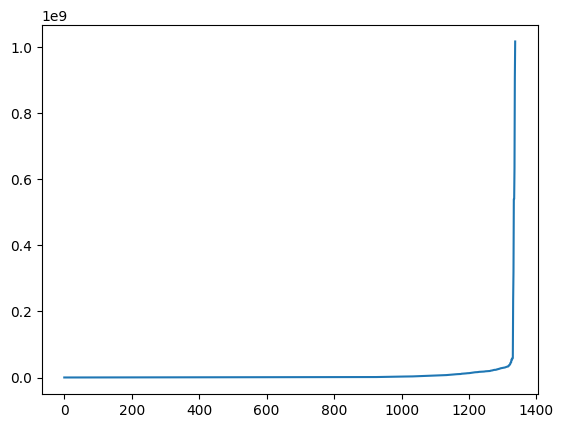

In [1269]:
plt.plot(distances)

In [1270]:
X.shape

(1338, 8)

In [1271]:
dbscan = DBSCAN(eps=0.1*(10**9),min_samples=17)
predict = dbscan.fit_predict(X)

In [1272]:
X[predict==-1]

,age,bmi,children,past_consultations,num_of_steps,NUmber_of_past_hospitalizations,Anual_Salary,charges
1181,61.0,29.920,3.0,15.0,1041377.0,2.0,1.046124e+09,30942.19180
1325,60.0,40.920,0.0,20.0,1072525.0,2.0,2.431618e+09,48673.55880
1326,57.0,42.130,1.0,20.0,1083241.0,2.0,2.463222e+09,48675.51770
1327,63.0,37.700,0.0,35.0,1085496.0,2.0,2.446348e+09,48824.45000
1328,44.0,38.060,0.0,25.0,1072324.0,2.0,2.430290e+09,48885.13561
1330,64.0,36.960,2.0,28.0,1091279.0,2.0,2.489508e+09,49577.66240
1331,28.0,36.400,1.0,26.0,1080113.0,2.0,2.682705e+09,51194.55914
1332,60.0,32.800,0.0,40.0,1095960.0,2.0,2.780642e+09,52590.82939
1333,33.0,35.530,0.0,32.0,1091267.0,2.0,3.101107e+09,55135.40209
1334,31.0,38.095,1.0,31.0,1107872.0,2.0,3.484216e+09,58571.07448


In [1273]:
np.unique(predict)

array([-1,  0,  1,  2], dtype=int64)

In [1274]:
len(np.where(predict==0)[0])

1182

In [1275]:
idx = np.where(predict==1)[0]

In [1276]:
idx

array([1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193,
       1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204,
       1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215,
       1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226,
       1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237,
       1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248,
       1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259,
       1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270,
       1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281,
       1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292,
       1293, 1294, 1295, 1296, 1297, 1298, 1300], dtype=int64)

In [1277]:
df.loc[idx]

,age,sex,bmi,children,smoker,past_consultations,num_of_steps,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
1183,44.0,male,29.735,2.0,no,16.0,1053649.0,2.0,1.067296e+09,northeast,32108.66282
1184,19.0,male,30.250,0.0,yes,24.0,1050415.0,2.0,1.152574e+09,southeast,32548.34050
1185,32.0,female,17.765,2.0,yes,22.0,1053386.0,2.0,1.126181e+09,northwest,32734.18630
1186,42.0,male,28.310,3.0,yes,16.0,1044862.0,2.0,1.080461e+09,northwest,32787.45859
1187,19.0,female,30.020,0.0,yes,26.0,1049111.0,2.0,1.125743e+09,northwest,33307.55080
...,...,...,...,...,...,...,...,...,...,...,...
1295,51.0,female,38.060,0.0,yes,30.0,1072838.0,2.0,2.060998e+09,southeast,44400.40640
1296,55.0,female,35.200,0.0,yes,33.0,1069003.0,2.0,2.058096e+09,southeast,44423.80300
1297,22.0,male,52.580,1.0,yes,26.0,1070847.0,2.0,2.001538e+09,southeast,44501.39820
1298,29.0,male,35.500,2.0,yes,28.0,1080849.0,2.0,2.064737e+09,southwest,44585.45587


In [1278]:
len(df[~df.index.isin(idx)])

1221

In [1279]:
df.index.isin([0])

array([ True, False, False, ..., False, False, False])

In [1280]:
idx

array([1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193,
       1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204,
       1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215,
       1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226,
       1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237,
       1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248,
       1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259,
       1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270,
       1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281,
       1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292,
       1293, 1294, 1295, 1296, 1297, 1298, 1300], dtype=int64)

In [1281]:
df.index.isin(idx)

array([False, False, False, ..., False, False, False])

In [1282]:
df[~df.index.isin(idx)].reset_index(drop=True)

,age,sex,bmi,children,smoker,past_consultations,num_of_steps,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,17.0,715428.0,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,7.0,699157.0,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,19.0,702341.0,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,11.0,700250.0,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,16.0,711584.0,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...
1216,33.0,female,35.530,0.0,yes,32.0,1091267.0,2.0,3.101107e+09,northwest,55135.40209
1217,31.0,female,38.095,1.0,yes,31.0,1107872.0,2.0,3.484216e+09,northeast,58571.07448
1218,52.0,male,34.485,3.0,yes,25.0,1092005.0,2.0,3.640807e+09,northwest,60021.39897
1219,45.0,male,30.360,0.0,yes,34.0,1106821.0,3.0,4.006359e+09,southeast,62592.87309


In [1283]:
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X)

In [1284]:
neighbors = NearestNeighbors(n_neighbors=5).fit(X)
distances,_ = neighbors.kneighbors(X)
kth_distances = distances[:,-1]
threshold = np.mean(kth_distances) + 2 * np.std(kth_distances)
outliers = X_transformed[kth_distances > threshold]

In [1285]:
outliers

array([[2.31068675e+09, 1.05827118e+05],
       [2.40862443e+09, 1.01712207e+05],
       [2.72908961e+09, 1.44821458e+05],
       [3.11219836e+09, 1.74152987e+05],
       [3.26878892e+09, 2.08760961e+05],
       [3.63434074e+09, 2.37812700e+05],
       [3.74517887e+09, 2.57569673e+05]])

In [1286]:
outliers

array([[2.31068675e+09, 1.05827118e+05],
       [2.40862443e+09, 1.01712207e+05],
       [2.72908961e+09, 1.44821458e+05],
       [3.11219836e+09, 1.74152987e+05],
       [3.26878892e+09, 2.08760961e+05],
       [3.63434074e+09, 2.37812700e+05],
       [3.74517887e+09, 2.57569673e+05]])

In [1287]:
normal_X = X_transformed[kth_distances <= threshold]

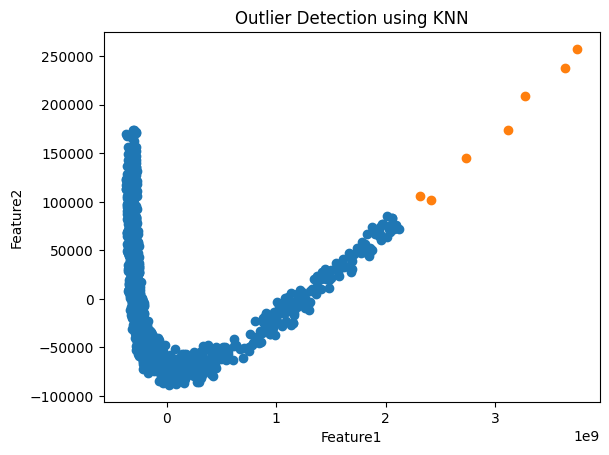

In [1288]:
plt.title("Outlier Detection using KNN")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.scatter(x=normal_X[:,0],y=normal_X[:,1])
plt.scatter(x=outliers[:,0],y=outliers[:,1])
plt.show()

In [1289]:
normal_X1 = X[kth_distances <= threshold]

In [1290]:
normal_X1

,age,bmi,children,past_consultations,num_of_steps,NUmber_of_past_hospitalizations,Anual_Salary,charges
0,18.0,23.21,0.0,17.0,715428.0,0.0,5.578497e+07,1121.87390
1,18.0,30.14,0.0,7.0,699157.0,0.0,1.370089e+07,1131.50660
2,18.0,33.33,0.0,19.0,702341.0,0.0,7.352311e+07,1135.94070
3,18.0,33.66,0.0,11.0,700250.0,0.0,7.581968e+07,1136.39940
4,18.0,34.10,0.0,16.0,711584.0,0.0,2.301232e+07,1137.01100
...,...,...,...,...,...,...,...,...
1326,57.0,42.13,1.0,20.0,1083241.0,2.0,2.463222e+09,48675.51770
1327,63.0,37.70,0.0,35.0,1085496.0,2.0,2.446348e+09,48824.45000
1328,44.0,38.06,0.0,25.0,1072324.0,2.0,2.430290e+09,48885.13561
1329,59.0,41.14,1.0,38.0,1079931.0,2.0,2.399896e+09,48970.24760


In [1291]:
dbscan = DBSCAN(eps=4000,min_samples=5)
predict = dbscan.fit_predict(normal_X1)

In [1292]:
np.unique(predict)

array([-1], dtype=int64)

In [1293]:
negihbors = NearestNeighbors(n_neighbors=5).fit(normal_X1)
distance,_ = negihbors.kneighbors(normal_X1)
distance = np.sort(distances[:,-1])

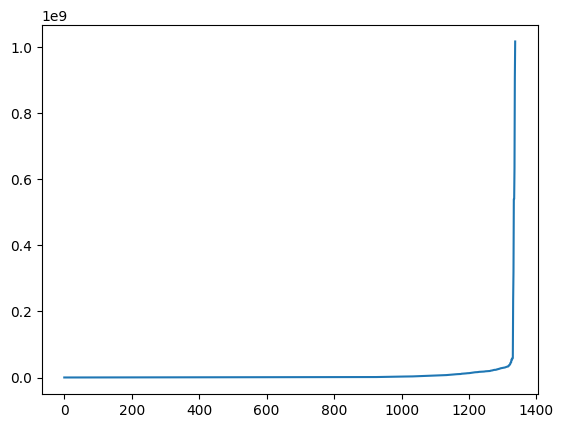

In [1294]:
plt.plot(distance)

In [1295]:
dbscan = DBSCAN(eps=0.1*(10**9),min_samples=17)
predict = dbscan.fit_predict(normal_X1)
np.unique(predict)

array([-1,  0,  1,  2], dtype=int64)

In [1296]:
np.unique(predict)

array([-1,  0,  1,  2], dtype=int64)

In [1297]:
normal_X1[predict==-1]

,age,bmi,children,past_consultations,num_of_steps,NUmber_of_past_hospitalizations,Anual_Salary,charges
1181,61.0,29.92,3.0,15.0,1041377.0,2.0,1.046124e+09,30942.19180
1325,60.0,40.92,0.0,20.0,1072525.0,2.0,2.431618e+09,48673.55880
1326,57.0,42.13,1.0,20.0,1083241.0,2.0,2.463222e+09,48675.51770
1327,63.0,37.70,0.0,35.0,1085496.0,2.0,2.446348e+09,48824.45000
1328,44.0,38.06,0.0,25.0,1072324.0,2.0,2.430290e+09,48885.13561
1330,64.0,36.96,2.0,28.0,1091279.0,2.0,2.489508e+09,49577.66240


In [1298]:
normal_X2 = normal_X1[predict!=-1]

In [1299]:
normal_X2.reset_index(drop=True)

,age,bmi,children,past_consultations,num_of_steps,NUmber_of_past_hospitalizations,Anual_Salary,charges
0,18.0,23.210,0.0,17.0,715428.0,0.0,5.578497e+07,1121.87390
1,18.0,30.140,0.0,7.0,699157.0,0.0,1.370089e+07,1131.50660
2,18.0,33.330,0.0,19.0,702341.0,0.0,7.352311e+07,1135.94070
3,18.0,33.660,0.0,11.0,700250.0,0.0,7.581968e+07,1136.39940
4,18.0,34.100,0.0,16.0,711584.0,0.0,2.301232e+07,1137.01100
...,...,...,...,...,...,...,...,...
1320,64.0,33.800,1.0,38.0,1064345.0,2.0,2.380291e+09,47928.03000
1321,60.0,39.900,0.0,33.0,1084625.0,2.0,2.409971e+09,48173.36100
1322,61.0,36.385,1.0,35.0,1077227.0,2.0,2.401083e+09,48517.56315
1323,54.0,40.565,3.0,35.0,1086594.0,2.0,2.381944e+09,48549.17835


In [1300]:
pca = PCA(n_components=2)
normal_X2_transformed = pca.fit_transform(normal_X2)

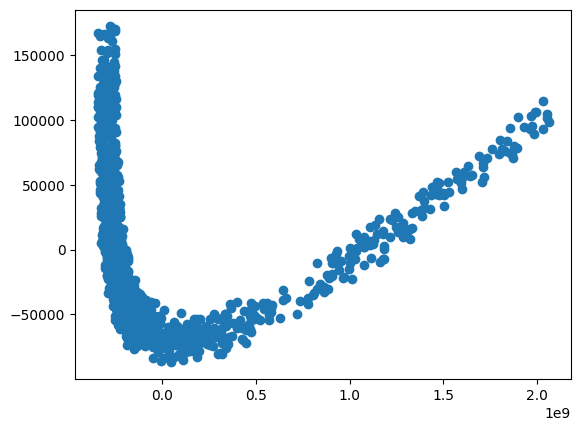

In [1301]:
plt.scatter(x=normal_X2_transformed[:,0],y=normal_X2_transformed[:,1])
plt.show()

In [1302]:
df1 = df.copy()
df2 = df

In [1303]:
normal_X2

,age,bmi,children,past_consultations,num_of_steps,NUmber_of_past_hospitalizations,Anual_Salary,charges
0,18.0,23.210,0.0,17.0,715428.0,0.0,5.578497e+07,1121.87390
1,18.0,30.140,0.0,7.0,699157.0,0.0,1.370089e+07,1131.50660
2,18.0,33.330,0.0,19.0,702341.0,0.0,7.352311e+07,1135.94070
3,18.0,33.660,0.0,11.0,700250.0,0.0,7.581968e+07,1136.39940
4,18.0,34.100,0.0,16.0,711584.0,0.0,2.301232e+07,1137.01100
...,...,...,...,...,...,...,...,...
1321,64.0,33.800,1.0,38.0,1064345.0,2.0,2.380291e+09,47928.03000
1322,60.0,39.900,0.0,33.0,1084625.0,2.0,2.409971e+09,48173.36100
1323,61.0,36.385,1.0,35.0,1077227.0,2.0,2.401083e+09,48517.56315
1324,54.0,40.565,3.0,35.0,1086594.0,2.0,2.381944e+09,48549.17835


In [1304]:
merged_df = pd.merge(normal_X2, df.select_dtypes('object'), left_index=True, right_index=True)


In [1305]:
merged_df.isnull().sum()

age                                0
bmi                                0
children                           0
past_consultations                 0
num_of_steps                       0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
charges                            0
sex                                0
smoker                             0
region                             0
dtype: int64

In [1306]:
# df = merged_df.reset_index(drop=True)

## EDA

In [1307]:
num_cols = df.select_dtypes('number').columns

In [1308]:
cat_cols = df.select_dtypes('object').columns

In [1309]:
cat_cols

Index(['sex', 'smoker', 'region'], dtype='object')

In [1310]:
num_cols

Index(['age', 'bmi', 'children', 'past_consultations', 'num_of_steps',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'charges'],
      dtype='object')

In [1311]:
def plot_boxplot(x):
    plt.title(f"Box Plot {x}")
    plt.xlabel(x)
    sns.boxplot(df[x])
    plt.show()

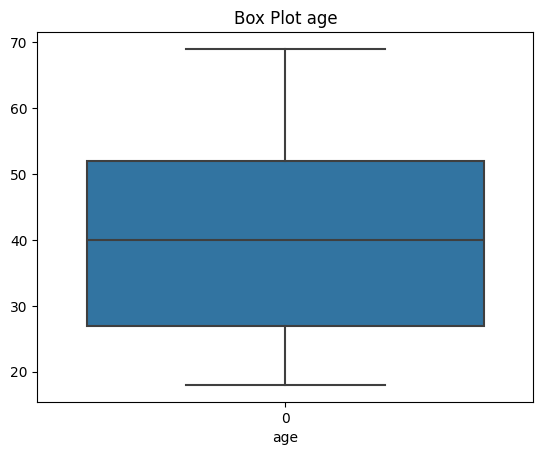

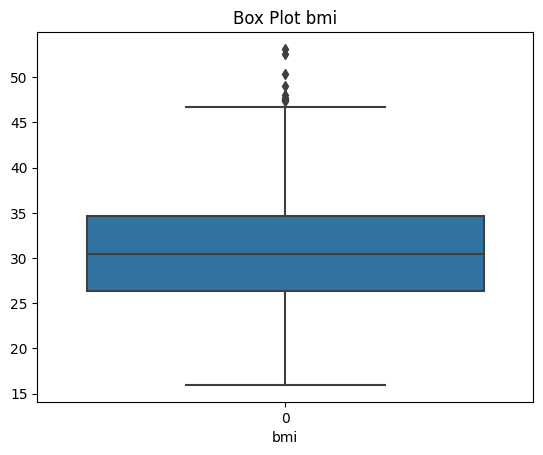

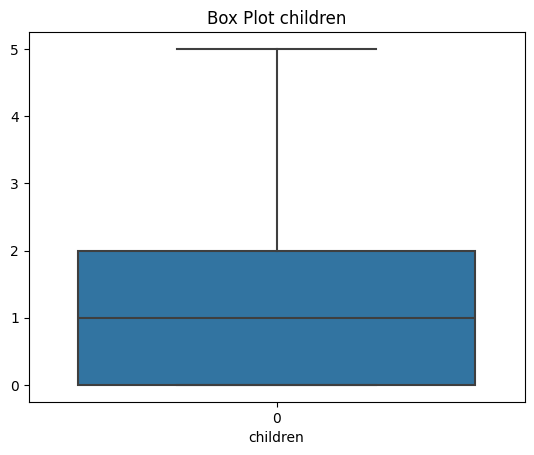

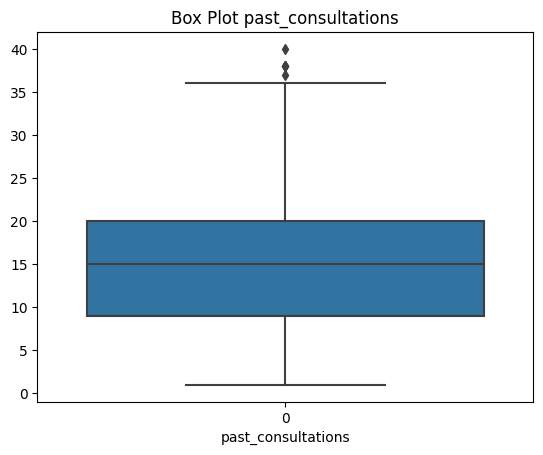

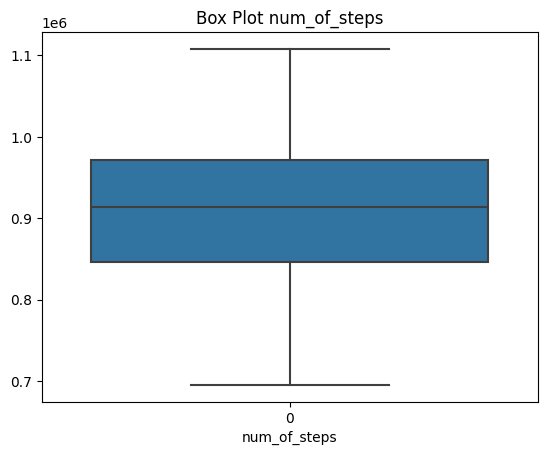

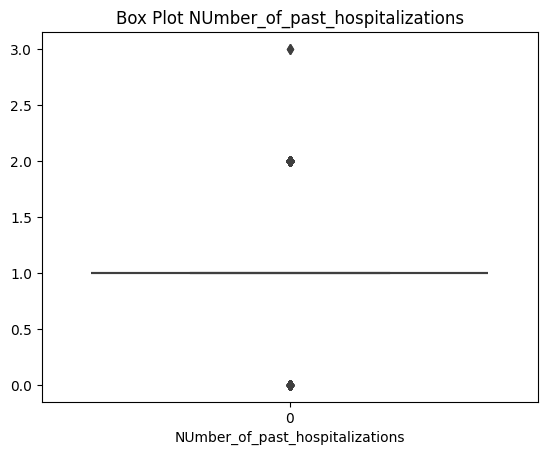

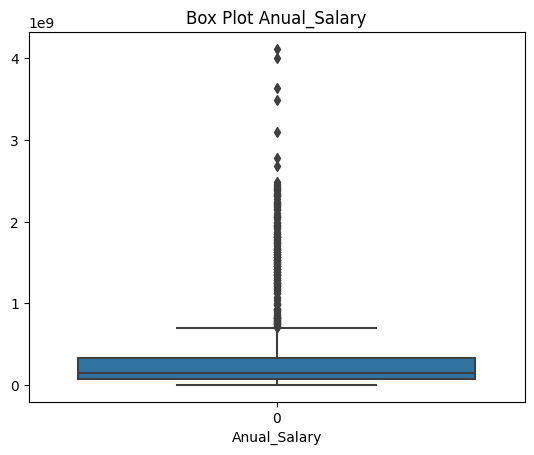

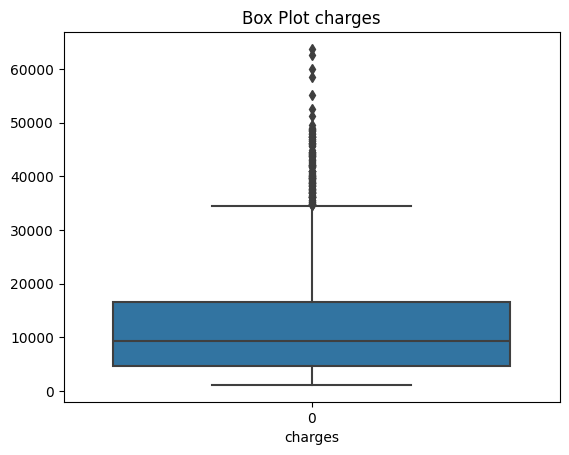

In [1312]:
for col in num_cols:
    plot_boxplot(col)

<Axes: >

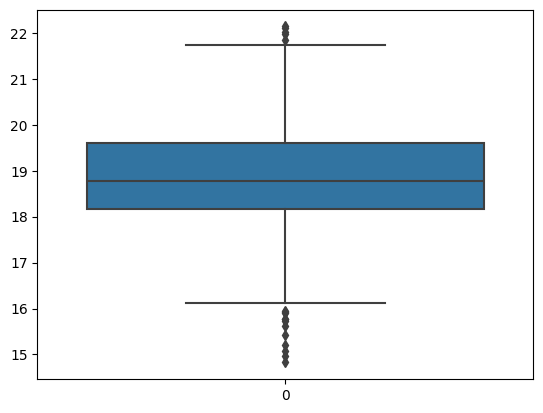

In [1313]:
df['salary_log'] = np.log1p(df['Anual_Salary'])
sns.boxplot(df['salary_log'])

**Scatter Plot**

In [1314]:
def plot_scatter(x):
    plt.title(f"Scatter plot {x} and Charges")
    plt.xlabel(x)
    plt.ylabel("Charges")
    plt.scatter(x=df[x],y=df['charges'])
    plt.show()

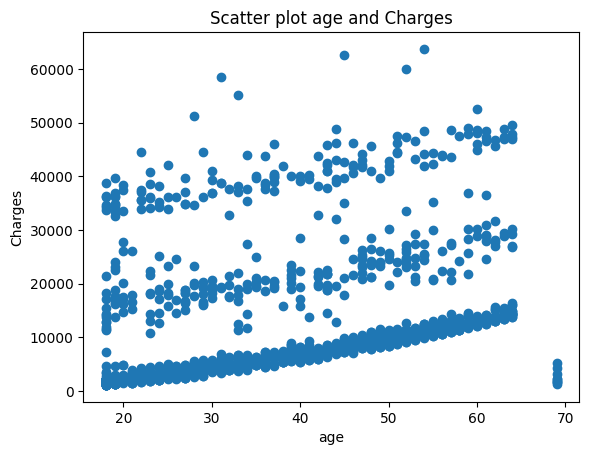

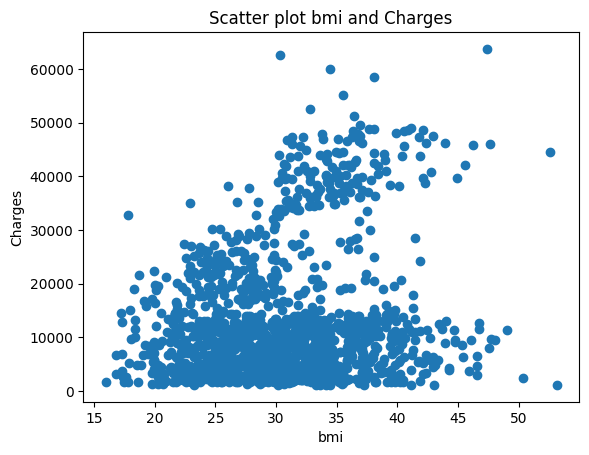

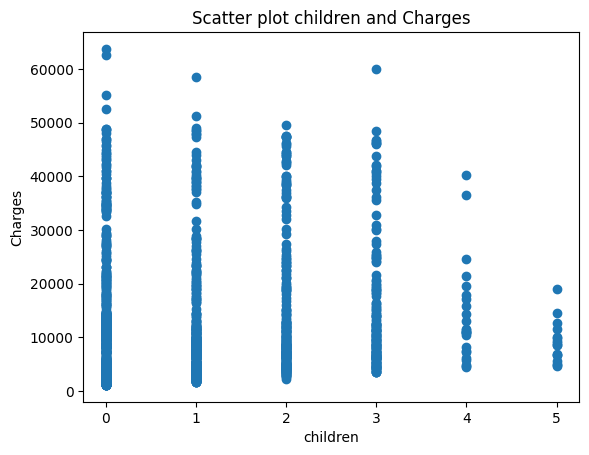

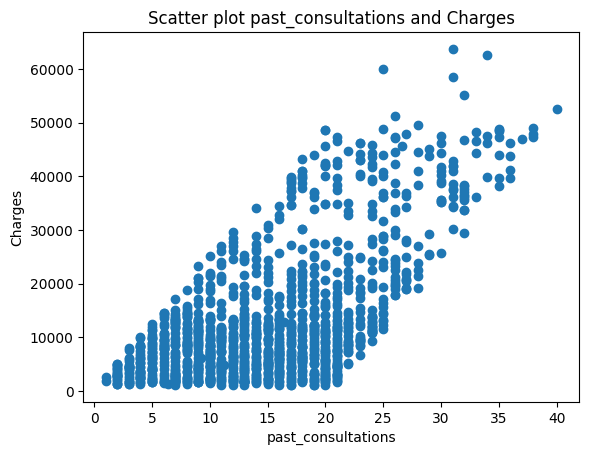

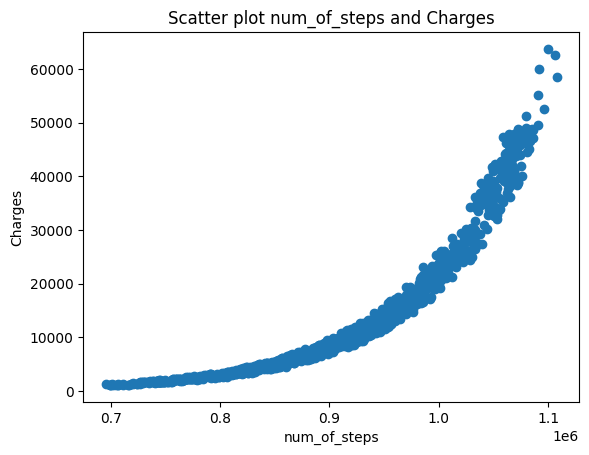

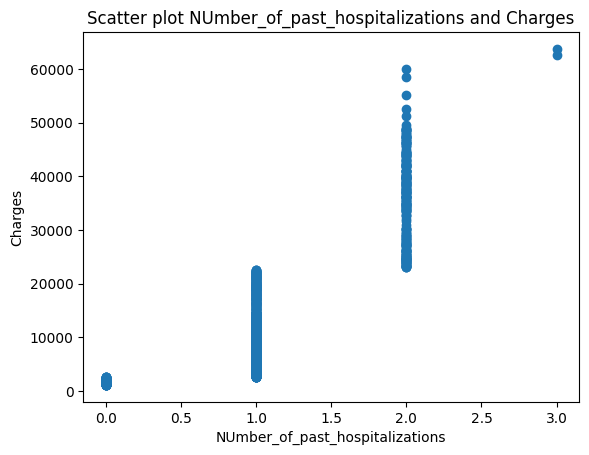

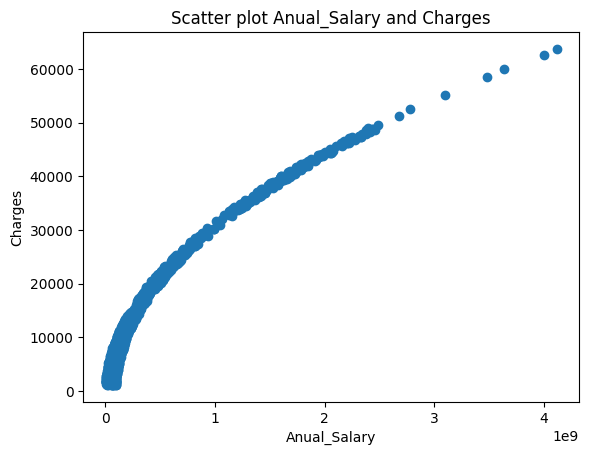

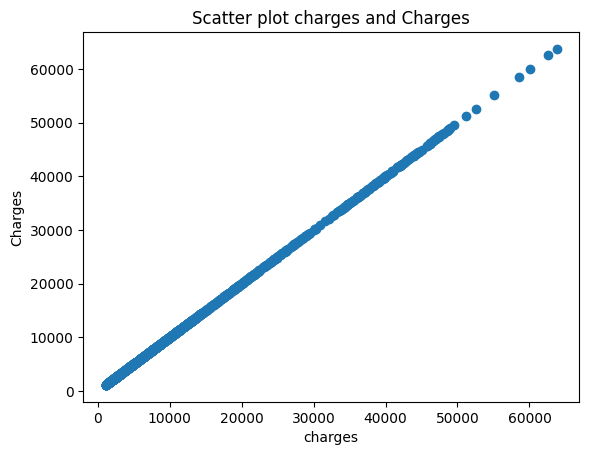

In [1315]:
for col in num_cols:
    plot_scatter(col)

**Histogram**

In [1316]:
def plot_hist(x):
    plt.title(f"Histogram for {x}")
    plt.xlabel(x)
    plt.ylabel("Frequency")
    sns.histplot(df[col],kde=True)
    plt.show()

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


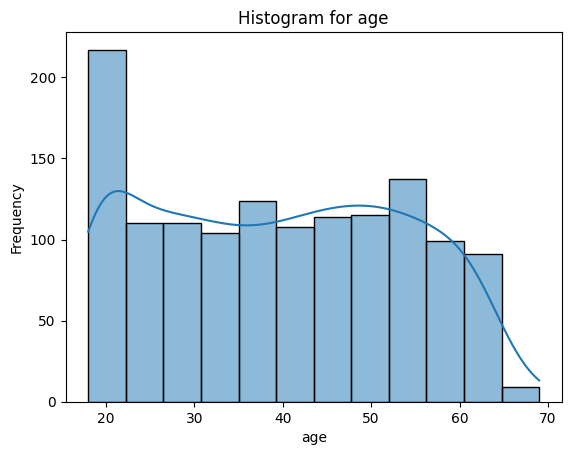

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


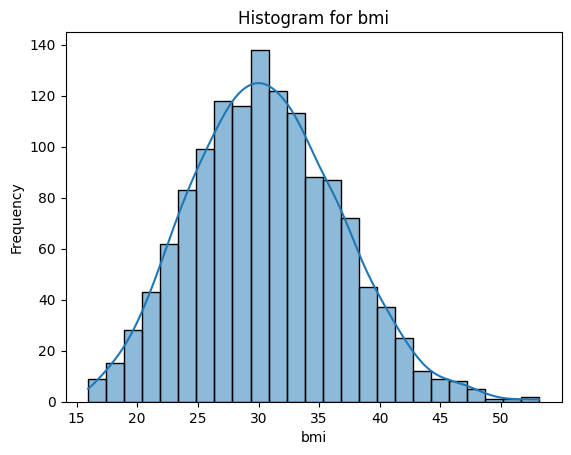

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


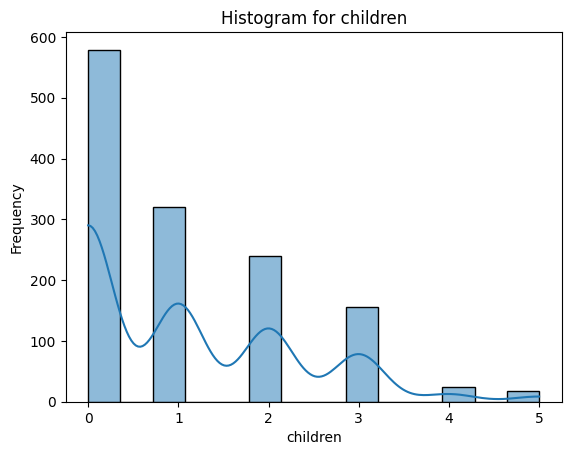

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


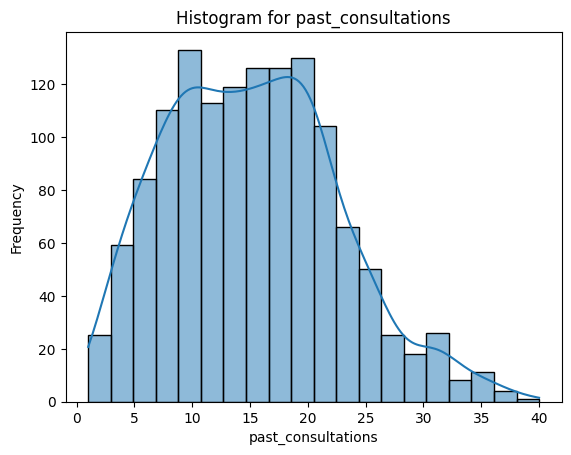

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


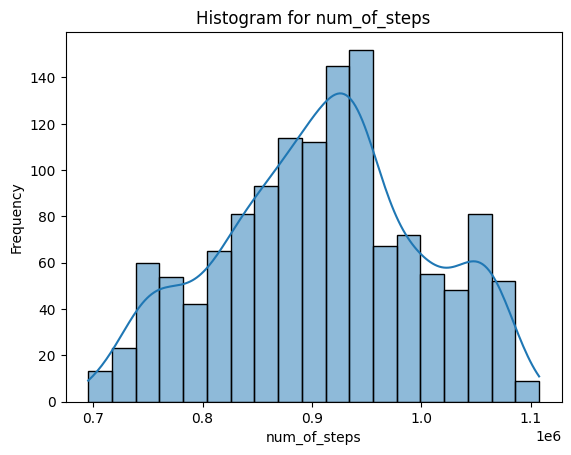

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


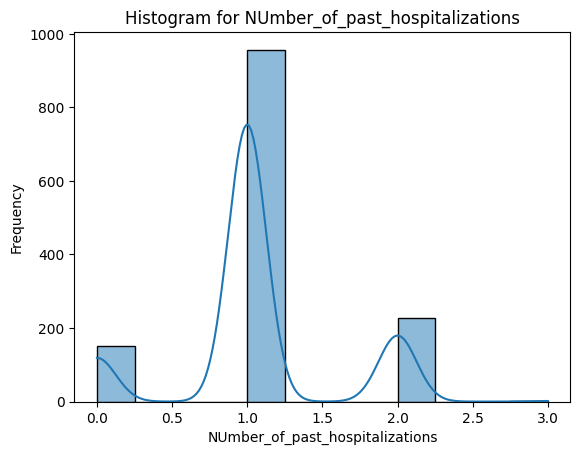

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


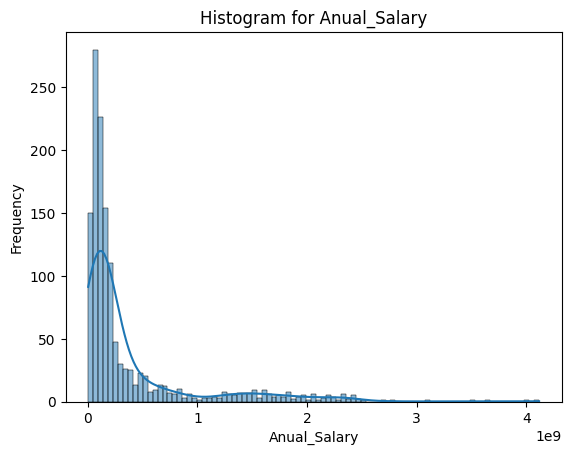

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


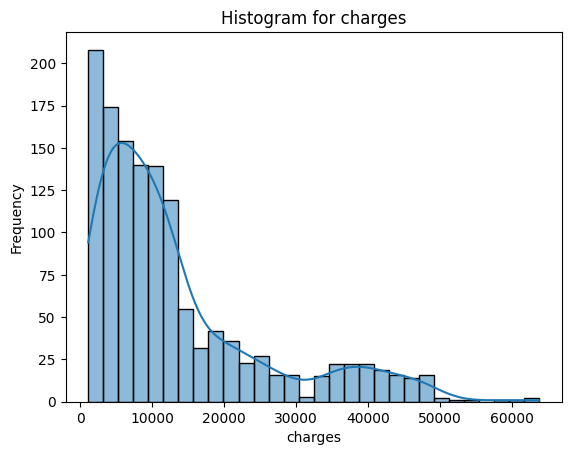

In [1317]:
for col in num_cols:
    plot_hist(col)

In [1318]:
df.drop('Anual_Salary',axis=1,inplace=True)

In [1319]:
df.head()

,age,sex,bmi,children,smoker,past_consultations,num_of_steps,NUmber_of_past_hospitalizations,region,charges,salary_log
0,18.0,male,23.21,0.0,no,17.0,715428.0,0.0,southeast,1121.8739,17.837015
1,18.0,male,30.14,0.0,no,7.0,699157.0,0.0,southeast,1131.5066,16.432971
2,18.0,male,33.33,0.0,no,19.0,702341.0,0.0,southeast,1135.9407,18.113110
3,18.0,male,33.66,0.0,no,11.0,700250.0,0.0,southeast,1136.3994,18.143868
4,18.0,male,34.10,0.0,no,16.0,711584.0,0.0,southeast,1137.0110,16.951540


Categorical Data

In [1320]:
cat_cols

Index(['sex', 'smoker', 'region'], dtype='object')

Bar Plot

In [1321]:
def plot_bar(x):
    plt.title(f"Bar plot for {x}")
    plt.xlabel(x)
    data = df[x].value_counts()
    plt.bar(data.index,data.values)
    plt.show()

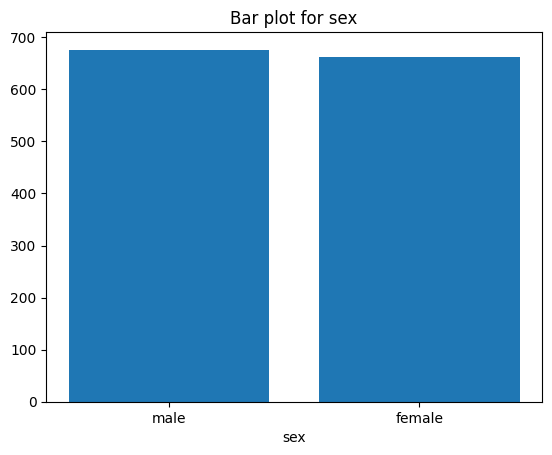

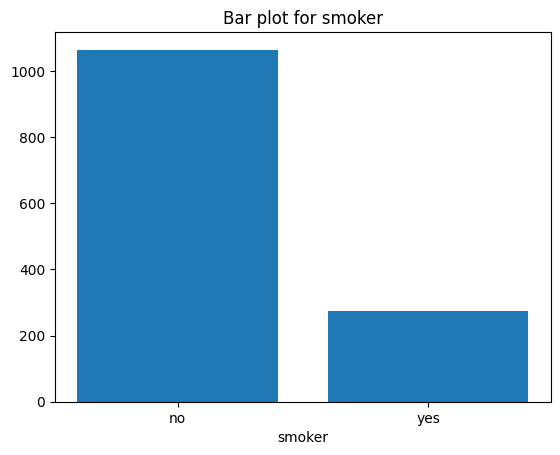

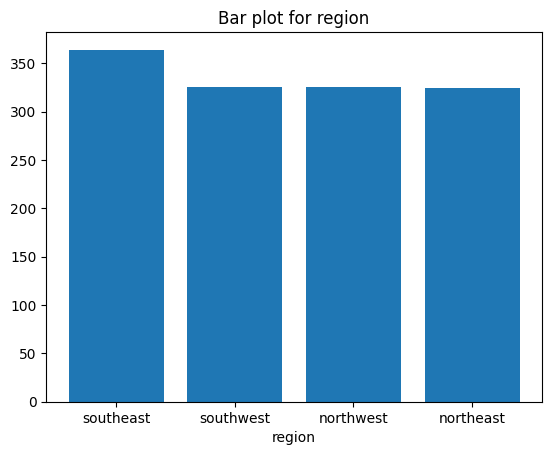

In [1322]:
for col in cat_cols:
    plot_bar(col)

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-

<Axes: xlabel='charges', ylabel='Density'>

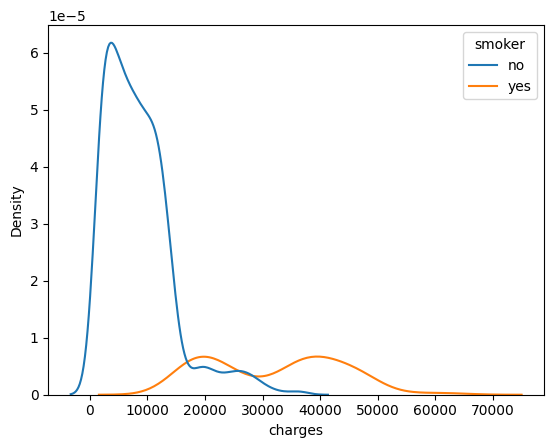

In [1323]:
sns.kdeplot(data=df, x="charges", hue="smoker")

Encode

In [1324]:
df

,age,sex,bmi,children,smoker,past_consultations,num_of_steps,NUmber_of_past_hospitalizations,region,charges,salary_log
0,18.0,male,23.210,0.0,no,17.0,715428.0,0.0,southeast,1121.87390,17.837015
1,18.0,male,30.140,0.0,no,7.0,699157.0,0.0,southeast,1131.50660,16.432971
2,18.0,male,33.330,0.0,no,19.0,702341.0,0.0,southeast,1135.94070,18.113110
3,18.0,male,33.660,0.0,no,11.0,700250.0,0.0,southeast,1136.39940,18.143868
4,18.0,male,34.100,0.0,no,16.0,711584.0,0.0,southeast,1137.01100,16.951540
...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,32.0,1091267.0,2.0,northwest,55135.40209,21.855025
1334,31.0,female,38.095,1.0,yes,31.0,1107872.0,2.0,northeast,58571.07448,21.971509
1335,52.0,male,34.485,3.0,yes,25.0,1092005.0,2.0,northwest,60021.39897,22.015471
1336,45.0,male,30.360,0.0,yes,34.0,1106821.0,3.0,southeast,62592.87309,22.111149


In [1325]:
def relation_with_target(x):
    print(df.groupby(x)['charges'].mean())
    print(df.groupby(x)['charges'].median())


In [1326]:
for col in cat_cols:
    relation_with_target(col)

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64
sex
female    9412.96250
male      9369.61575
Name: charges, dtype: float64
smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64
smoker
no      7345.40530
yes    34456.34845
Name: charges, dtype: float64
region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64
region
northeast    10057.652025
northwest     8965.795750
southeast     9294.131950
southwest     8798.593000
Name: charges, dtype: float64


Here we can coclude that there is a significant realtion with smokers and charges

## Data Preparation

In [1327]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [1328]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

In [1329]:
df[cat_cols]

,sex,smoker,region
0,male,no,southeast
1,male,no,southeast
2,male,no,southeast
3,male,no,southeast
4,male,no,southeast
...,...,...,...
1333,female,yes,northwest
1334,female,yes,northeast
1335,male,yes,northwest
1336,male,yes,southeast


In [1330]:
one_hot_encoder = OneHotEncoder(sparse_output=False)
sex_encoded = pd.DataFrame(one_hot_encoder.fit_transform(df[['sex']]),columns=one_hot_encoder.get_feature_names_out())
region_encoded = pd.DataFrame(one_hot_encoder.fit_transform(df[['region']]),columns=one_hot_encoder.get_feature_names_out())
df_encoded = pd.concat([df,region_encoded,sex_encoded],axis=1)

In [1331]:
ordinal_encoder = OrdinalEncoder(categories=[['no','yes']])
df_encoded['smoker_encoded'] = ordinal_encoder.fit_transform(df[['smoker']])

In [1332]:
df_encoded = df_encoded.drop(['region','sex','smoker'],axis=1)

In [1333]:
df_encoded.head()

,age,bmi,children,past_consultations,num_of_steps,NUmber_of_past_hospitalizations,charges,salary_log,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,smoker_encoded
0,18.0,23.21,0.0,17.0,715428.0,0.0,1121.8739,17.837015,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,18.0,30.14,0.0,7.0,699157.0,0.0,1131.5066,16.432971,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,18.0,33.33,0.0,19.0,702341.0,0.0,1135.9407,18.113110,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,18.0,33.66,0.0,11.0,700250.0,0.0,1136.3994,18.143868,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,18.0,34.10,0.0,16.0,711584.0,0.0,1137.0110,16.951540,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [1334]:
df_encoded.corr()

,age,bmi,children,past_consultations,num_of_steps,NUmber_of_past_hospitalizations,charges,salary_log,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,smoker_encoded
age,1.000000,0.110156,0.033935,0.158549,0.488537,0.337313,0.276876,0.345250,-0.009607,0.008516,-0.008348,0.009744,0.014280,-0.014280,-0.035584
bmi,0.110156,1.000000,0.005897,0.133583,0.133272,0.141527,0.198691,0.163741,-0.138391,-0.137404,0.271692,-0.006292,-0.045170,0.045170,0.003610
children,0.033935,0.005897,1.000000,0.057665,0.165447,0.187459,0.072874,0.095587,-0.023373,0.027316,-0.018959,0.015707,-0.017915,0.017915,0.011173
past_consultations,0.158549,0.133583,0.057665,1.000000,0.563322,0.508143,0.631317,0.591479,-0.007404,-0.007211,0.044701,-0.031780,-0.049166,0.049166,0.505566
num_of_steps,0.488537,0.133272,0.165447,0.563322,1.000000,0.851515,0.890382,0.910616,0.040545,-0.014354,0.015408,-0.042138,-0.007016,0.007016,0.665492
NUmber_of_past_hospitalizations,0.337313,0.141527,0.187459,0.508143,0.851515,1.000000,0.823849,0.793047,0.017583,0.004322,0.021887,-0.044598,-0.000213,0.000213,0.590605
charges,0.276876,0.198691,0.072874,0.631317,0.890382,0.823849,1.000000,0.923469,0.006349,-0.039905,0.073982,-0.043210,-0.057292,0.057292,0.787251
salary_log,0.345250,0.163741,0.095587,0.591479,0.910616,0.793047,0.923469,1.000000,0.014381,-0.024079,0.061093,-0.053685,-0.039692,0.039692,0.722472
region_northeast,-0.009607,-0.138391,-0.023373,-0.007404,0.040545,0.017583,0.006349,0.014381,1.000000,-0.320177,-0.345561,-0.320177,0.002425,-0.002425,0.002811
region_northwest,0.008516,-0.137404,0.027316,-0.007211,-0.014354,0.004322,-0.039905,-0.024079,-0.320177,1.000000,-0.346265,-0.320829,0.011156,-0.011156,-0.036945


In [1335]:
df_encoded = df_encoded.drop(['sex_female','num_of_steps'],axis=1)

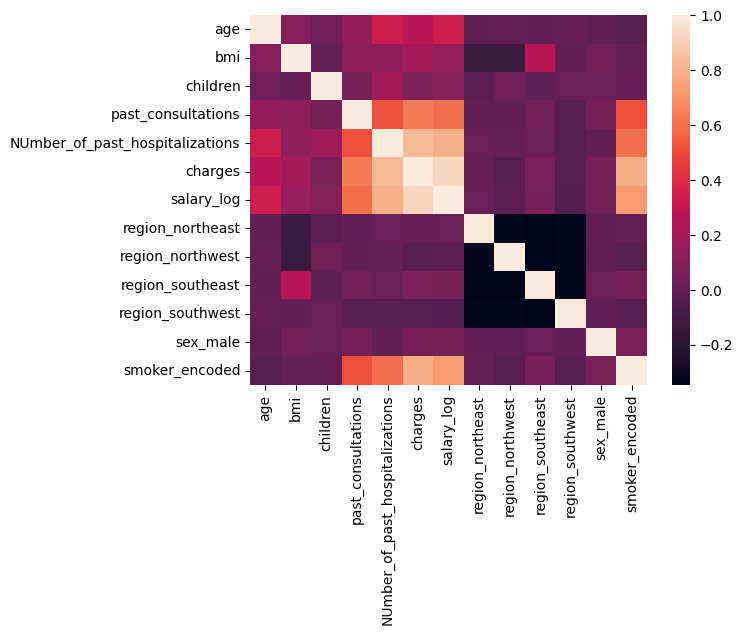

In [1336]:
sns.heatmap(df_encoded.corr())
plt.show()

In [1337]:
mid = len(df_encoded.columns) // 2

In [1338]:
df_encoded.columns[:mid]

Index(['age', 'bmi', 'children', 'past_consultations',
       'NUmber_of_past_hospitalizations', 'charges'],
      dtype='object')

In [1341]:
df_encoded

,age,bmi,children,past_consultations,NUmber_of_past_hospitalizations,charges,salary_log,region_northeast,region_northwest,region_southeast,region_southwest,sex_male,smoker_encoded
0,18.0,23.210,0.0,17.0,0.0,1121.87390,17.837015,0.0,0.0,1.0,0.0,1.0,0.0
1,18.0,30.140,0.0,7.0,0.0,1131.50660,16.432971,0.0,0.0,1.0,0.0,1.0,0.0
2,18.0,33.330,0.0,19.0,0.0,1135.94070,18.113110,0.0,0.0,1.0,0.0,1.0,0.0
3,18.0,33.660,0.0,11.0,0.0,1136.39940,18.143868,0.0,0.0,1.0,0.0,1.0,0.0
4,18.0,34.100,0.0,16.0,0.0,1137.01100,16.951540,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,35.530,0.0,32.0,2.0,55135.40209,21.855025,0.0,1.0,0.0,0.0,0.0,1.0
1334,31.0,38.095,1.0,31.0,2.0,58571.07448,21.971509,1.0,0.0,0.0,0.0,0.0,1.0
1335,52.0,34.485,3.0,25.0,2.0,60021.39897,22.015471,0.0,1.0,0.0,0.0,1.0,1.0
1336,45.0,30.360,0.0,34.0,3.0,62592.87309,22.111149,0.0,0.0,1.0,0.0,1.0,1.0


In [1342]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded.drop('charges',axis=1))

In [1343]:
cols = df_encoded.columns

In [1344]:
cols[cols!='charges']

Index(['age', 'bmi', 'children', 'past_consultations',
       'NUmber_of_past_hospitalizations', 'salary_log', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest', 'sex_male',
       'smoker_encoded'],
      dtype='object')

In [1345]:
df_scaled_df = pd.DataFrame(df_scaled,columns=cols[cols!='charges'])

In [1346]:
df_scaled_df

,age,bmi,children,past_consultations,NUmber_of_past_hospitalizations,salary_log,region_northeast,region_northwest,region_southeast,region_southwest,sex_male,smoker_encoded
0,-1.515696,-1.223642,-0.904824,0.240181,-1.984577,-0.903629,-0.565267,-0.566418,1.635795,-0.566418,0.989591,-0.507463
1,-1.515696,-0.086189,-0.904824,-1.099833,-1.984577,-2.053969,-0.565267,-0.566418,1.635795,-0.566418,0.989591,-0.507463
2,-1.515696,0.437400,-0.904824,0.508184,-1.984577,-0.677423,-0.565267,-0.566418,1.635795,-0.566418,0.989591,-0.507463
3,-1.515696,0.491565,-0.904824,-0.563828,-1.984577,-0.652223,-0.565267,-0.566418,1.635795,-0.566418,0.989591,-0.507463
4,-1.515696,0.563784,-0.904824,0.106180,-1.984577,-1.629103,-0.565267,-0.566418,1.635795,-0.566418,0.989591,-0.507463
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,-0.458711,0.798496,-0.904824,2.250203,1.758008,2.388346,-0.565267,1.765481,-0.611324,-0.566418,-1.010519,1.970587
1334,-0.599643,1.219501,-0.072187,2.116201,1.758008,2.483782,1.769076,-0.566418,-0.611324,-0.566418,-1.010519,1.970587
1335,0.880136,0.626976,1.593088,1.312193,1.758008,2.519801,-0.565267,1.765481,-0.611324,-0.566418,0.989591,1.970587
1336,0.386876,-0.050079,-0.904824,2.518206,3.629300,2.598190,-0.565267,-0.566418,1.635795,-0.566418,0.989591,1.970587


## Modelling

In [1347]:
X,y = df_scaled_df,df_encoded['charges']

In [1348]:
from sklearn.model_selection import train_test_split

In [1349]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [1350]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [1351]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
linear_model.score(X_train,y_train)

0.9098897553511952

In [1352]:
pred = linear_model.predict(X_test)

In [1353]:
mean_absolute_error(pred,y_test)

2521.7517420513177

In [1354]:
mean_squared_error(pred,y_test)

11198896.569190854

In [1355]:
np.sqrt(mean_squared_error(pred,y_test))

3346.475245566722

In [1356]:
r2_score(pred,y_test)

0.9182922304989882

In [1357]:
linear_model.coef_

array([ 166.2676361 ,  806.08169249, -254.7910509 ,  981.19495037,
       2975.8247446 , 5801.14700669,    7.57106543,  -75.26126665,
         12.17238795,   55.06649315,  152.39776638, 2980.12264447])

In [1358]:
linear_model.coef_ > 700

array([False,  True, False,  True,  True,  True, False, False, False,
       False, False,  True])

In [1359]:
cols = cols[cols!='charges']

In [1360]:
cols[linear_model.coef_ > 700]

Index(['bmi', 'past_consultations', 'NUmber_of_past_hospitalizations',
       'salary_log', 'smoker_encoded'],
      dtype='object')

In [1361]:
cols[linear_model.coef_ > 700]

Index(['bmi', 'past_consultations', 'NUmber_of_past_hospitalizations',
       'salary_log', 'smoker_encoded'],
      dtype='object')